In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 14

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                154       
                                                                 
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
107/137 [======================>.......] - ETA: 0s - loss: 2.4377 - accuracy: 0.2328
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 1s 3ms/step - loss: 2.3852 - accuracy: 0.2478 - val_loss: 2.0045 - val_accuracy: 0.3772
Epoch 2/1000
118/137 [========================>.....] - ETA: 0s - loss: 2.0161 - accuracy: 0.3298
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 2.0030 - accuracy: 0.3326 - val_loss: 1.6736 - val_accuracy: 0.3918
Epoch 3/1000
116/137 [========================>.....] - ETA: 0s - loss: 1.8034 - accuracy: 0.3722
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 1.7913 - accuracy: 0.3777 - val_loss: 1.4212 - val_accuracy: 0.4788
Epoch 4/1000
106/137 [======================>.......] - ETA: 0s - loss: 1.6414 - accu

Epoch 28/1000
113/137 [=======================>......] - ETA: 0s - loss: 0.9594 - accuracy: 0.6434
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.9616 - accuracy: 0.6462 - val_loss: 0.4950 - val_accuracy: 0.9020
Epoch 29/1000
118/137 [========================>.....] - ETA: 0s - loss: 0.9543 - accuracy: 0.6433
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.9545 - accuracy: 0.6437 - val_loss: 0.4995 - val_accuracy: 0.9195
Epoch 30/1000
111/137 [=======================>......] - ETA: 0s - loss: 0.9427 - accuracy: 0.6517
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.9415 - accuracy: 0.6533 - val_loss: 0.4899 - val_accuracy: 0.9231
Epoch 31/1000
115/137 [========================>.....] - ETA: 0s - loss: 0.9475

Epoch 55/1000
104/137 [=====================>........] - ETA: 0s - loss: 0.8640 - accuracy: 0.6974
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.8579 - accuracy: 0.6979 - val_loss: 0.3881 - val_accuracy: 0.9689
Epoch 56/1000
116/137 [========================>.....] - ETA: 0s - loss: 0.8607 - accuracy: 0.6997
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.7002 - val_loss: 0.4035 - val_accuracy: 0.9756
Epoch 57/1000
116/137 [========================>.....] - ETA: 0s - loss: 0.8464 - accuracy: 0.7041
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.7045 - val_loss: 0.3879 - val_accuracy: 0.9708
Epoch 58/1000
118/137 [========================>.....] - ETA: 0s - loss: 0.8383

Epoch 82/1000
117/137 [========================>.....] - ETA: 0s - loss: 0.7793 - accuracy: 0.7284
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.7289 - val_loss: 0.4001 - val_accuracy: 0.9630
Epoch 83/1000
114/137 [=======================>......] - ETA: 0s - loss: 0.7698 - accuracy: 0.7317
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.7322 - val_loss: 0.3784 - val_accuracy: 0.9757
Epoch 84/1000
121/137 [=========================>....] - ETA: 0s - loss: 0.7645 - accuracy: 0.7322
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
137/137 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.7336 - val_loss: 0.4376 - val_accuracy: 0.9393
Epoch 85/1000
116/137 [========================>.....] - ETA: 0s - loss: 0.7414

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

46/46 [==============================] - 0s 956us/step - loss: 0.3923 - accuracy: 0.9656


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 57ms/step
[3.7112065e-02 5.6873821e-02 2.9552651e-03 1.3641655e-03 1.5875350e-01
 3.2347616e-02 1.3248621e-04 2.2015426e-01 4.8144633e-01 2.7941083e-09
 6.5967578e-07 2.2671837e-05 2.7160780e-09 8.8370992e-03]
8


# 混同行列

182/182 [==============================] - 0s 710us/step


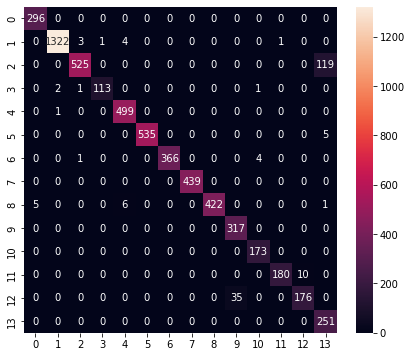

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       296
           1       1.00      0.99      1.00      1331
           2       0.99      0.82      0.89       644
           3       0.99      0.97      0.98       117
           4       0.98      1.00      0.99       500
           5       1.00      0.99      1.00       540
           6       1.00      0.99      0.99       371
           7       1.00      1.00      1.00       439
           8       1.00      0.97      0.99       434
           9       0.90      1.00      0.95       317
          10       0.97      1.00      0.99       173
          11       0.99      0.95      0.97       190
          12       0.95      0.83      0.89       211
          13       0.67      1.00      0.80       251

    accuracy                           0.97      5814
   macro avg       0.96      0.96      0.96      5814
weighted avg       0.97      0.97      0.97      5814



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Othmane\AppData\Local\Temp\tmppid458wo\assets


6928

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.7112072e-02 5.6873791e-02 2.9552665e-03 1.3641667e-03 1.5875359e-01
 3.2347620e-02 1.3248620e-04 2.2015427e-01 4.8144633e-01 2.7941032e-09
 6.5967578e-07 2.2671793e-05 2.7160783e-09 8.8371001e-03]
8
